In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
'''Loading Dataset'''
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



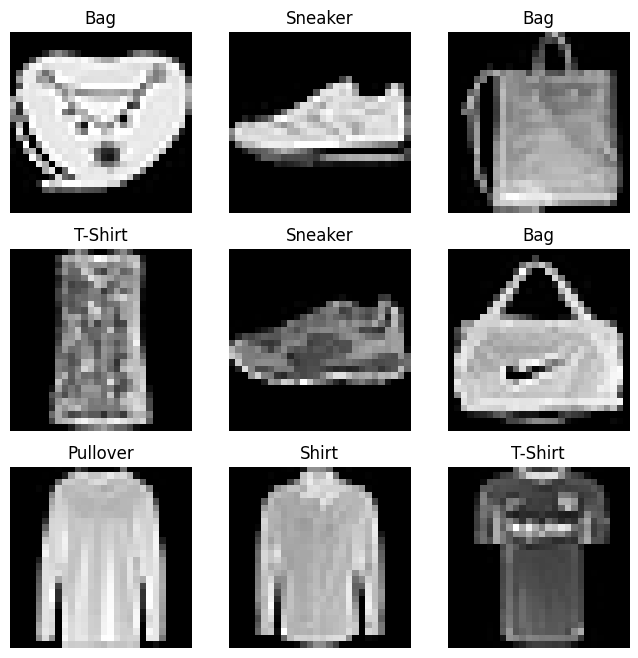

In [ ]:
'''Iterating and Visualizing the Dataset'''
# 对于Dataset对象,可以使用index来索引具体位置的数据，比如training_data[index]， 本质上他会调用数据集内置的 __getitem__()
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")

plt.show()

In [ ]:
# 1.The standard pipeline for displaying image(s) using matplotlib
# 1.1 Load the image:
# (1)使用matplotlib.pyplot本身
import matplotlib.pyplot as plt
image = plt.imread("XXX.jpg")
# （2）使用PIL.Image
from PIL import Image
image = Image.open("XXX.jpg")
# (3)使用opencv
import cv2 
image = cv2.imread("Xxx.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #OpenCV 读取图片是通过BGR通道的顺序，但是实际上对图片的操作是RGB，因此需要转换。

# 1.2 创建figure和ax
# 在matplotlib中，Figure是所有 plot 元素的最顶级容器，Axes是figure中实际展示图片的子区域；

# 1.2.1 对于1张图的情况：
fig, ax = plt.subplot()
ax.imshow(image)
ax.axis("off")
ax.set_title("XXX")
plt.show()

# 1.2.2 对于多张图的情况：
# （1）使用Grid（Subplot）——面向对象式
fig_size = (x, x)
figure = plt.figure(figsize = fig_size)
rows, cols = m, n
for i in range(rows * cols):
    ax = figure.add_subplot(rows, cols, i + 1) #会返回一个Axes对象
    ax.set_title("xxx")
    ax.axis("off")
    ax.imshow(image_x) #Read image using methods in 1.1 or directly pass a image numpy array to ax.imshow()
plt.show()

# 1.3 保存plot
plt.savefig("XXX.jpg")

# ax.imshow()和plt.imshow()的区别是什么？
（1）ax.imshow()接受的输入是数组（通常是Numpy数组），输出是将数组中的value映射到color map中定义的颜色。作用是在Axes对象中，指定什么数据将被展示为图片。<br>
（2）plt.imshow()的作用是打开一个GUI窗口，并且展示所有的figures。

In [ ]:
'''Creating a Custom Dataset for your files'''
# 一个Custom的Dataset类必须实现以下几个方法：__init__(), __len__() 和 __getitem__()
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform = None, target_transform = None):
        '''__init__() 仅仅在实例化这个Dataset对象的时候运行一次。通常在这个函数中：
        （1）初始化包含images的文件夹位置，标签文件的位置
        （2）定义有关数据和标签的transform转换方法        
        '''
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir  
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        '''返回数据集中包含的样本数量'''
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        '''在给定index的情况下，在数据集中加载并且返回该index对应的sample的数据。具体会做：
        （1）在具体的磁盘位置上加载图像，并且将其转换为tensor格式
        （2）检索得到对应index的标签
        （3）调用数据和标签的transform函数并且执行
        最后返回经过处理之后的图像tensor和对应的标签
        '''
        img_path = os.path.join(self.img_dir, self.img_labels.iloc(idx, 0))
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


# 1.为什么Python中有的函数的默认参数一个是self?
## 1.1 原因
&nbsp;&nbsp;&nbsp;&nbsp;self是某个类的实例的引用，主要用于该实例的实例方法中，用于access实例属性和方法。但是，因为Python这一门编程语言的特殊性，不像JAVA和C++, 它不会将实例（将类实例化后的对象）自动传入实例方法，因此只能在定义实例方法的时候，显示地将self作为默认的第一个参数定义并且传入才可以。<br>

## 1.2 实例属性和函数 vs 类属性和函数
&nbsp;&nbsp;&nbsp;&nbsp;（1）实例属性指的是只属于某一个具体的实例的变量，不同的实例之间的实例属性是独立的，互不影响，一般定义在__init__()或者实例函数中。<br>
&nbsp;&nbsp;&nbsp;&nbsp;而类属性是公共的变量，改变之后，所有的实例的该类属性都会改变。<br>
&nbsp;&nbsp;&nbsp;&nbsp;（2）实例函数指的是专门用于对某个具体的实例进行操作的函数，它能够获取并且修改实例属性。并且函数的定义的第一个参数总是默认为self。<br>
&nbsp;&nbsp;&nbsp;&nbsp;类函数就是普通定义的函数了，所有的实例都可以调用的函数，第一个参数通常可以不必设置为self.<br>


In [ ]:
'''Preparing your data for training with DataLoaders'''
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

In [ ]:
'''Iterate through the DataLoader'''
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap = "gray")
plt.show()

print(label)

# 1. DataLoader常用的属性和函数
# 1.1 常用属性
![DataLoader常用属性](./images/DataLoader常用属性.jpg)
# 1.2 常用函数
![DataLoader常用函数](./images/DataLoader常用函数.jpg)
# 2.Python中的Iterator是什么
## 2.1 定义
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;是一个允许迭代式地逐个加载元素，而不是一次性加载所有元素的一个Object。
## 2.2 特点
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1)Iterator遵循迭代器准则，也就是必须实现__iter__()和__next__()方法，前者会返回迭代器本身，后者会返回序列中的下一个元素，并且当没有元素之后会raise StopIteration错误。这种方式也叫做Lazy Iteration，意思就是只有当需要的时候才会加载某个元素，而不是一次性全部加载到内存中，这样的话，就更加memory-efficient. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2)Iterator对象不能被重复使用，当遍历完成之后，需要重新创建新的Iterator对象进行新的遍历。<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(3)Generators(yield)提供了一种更加便捷的方式创建Iterator，但是在这里不展开描述了，TBD。
## 2.3 Iterable和Iterator的区别
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;个人理解：前者指的是某个变量，但是本身就支持迭代器的属性，并且可以被显示地转换为迭代器，后者就是迭代器本身了。<br>
！[](./images/Iterable和Iterator的区别.jpg)
